In [8]:
import pprint
import cv2
from ultralytics import YOLO
from utils.yolo import parse_yolo_predictions, draw_bounding_boxes
from device import current_device
# from keras.models import load_model

In [9]:
import torch

climberYoloModel = YOLO("weights/climb_walk/climber.pt").to(torch.device(current_device))
print("Climber YOLO Loaded")
pretrainedYoloModel = YOLO("weights/yolo_v8/yolov8n.pt").to(torch.device(current_device))
print("Pretrained YOLO Loaded")
accidentYoloModel = YOLO("weights/accident/accident_latest.pt").to(torch.device(current_device))
print("Accident YOLO Loaded")
fireExplosionYoloModel = YOLO("weights/fire_explosion/fire_optimal.pt").to(torch.device(current_device))
print("Fire Explosion YOLO Loaded")
crackYoloModel = YOLO("weights/crack/crack.pt").to(torch.device(current_device))
print("Crack YOLO Loaded")
fireExplosionYoloModelExtraEpoch = YOLO("weights/fire_explosion/fire_optimal_ep300.pt").to(torch.device(current_device))
print("Fire Explosion extra epoch YOLO Loaded")

Climber YOLO Loaded
Pretrained YOLO Loaded
Accident YOLO Loaded
Fire Explosion YOLO Loaded
Crack YOLO Loaded
Fire Explosion extra epoch YOLO Loaded


In [4]:
import io

frame = cv2.imread("../samples/roadaccident2.png")
outputs = pretrainedYoloModel.predict(source=frame)
detections = parse_yolo_predictions(outputs)
# frame_to_send = draw_bounding_boxes(frame, detections)
# byte_im_io = io.BytesIO(cv2.imencode(
#             '.jpg', frame_to_send)[1].tobytes())
# with open("output.jpeg", "wb") as f:
#     f.write(byte_im_io.getbuffer())

accidentOutputs = accidentYoloModel.predict(source=frame)
accident_detections = parse_yolo_predictions(accidentOutputs, 0)

fireExplosionOutputs = fireExplosionYoloModel.predict(source=frame)
fireExplosion_detections = parse_yolo_predictions(fireExplosionOutputs, 0)


0: 384x640 6 cars, 1 traffic light, 77.5ms
Speed: 7.6ms preprocess, 77.5ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.1ms
Speed: 1.7ms preprocess, 42.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 256x416 (no detections), 24.5ms
Speed: 0.9ms preprocess, 24.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 416)


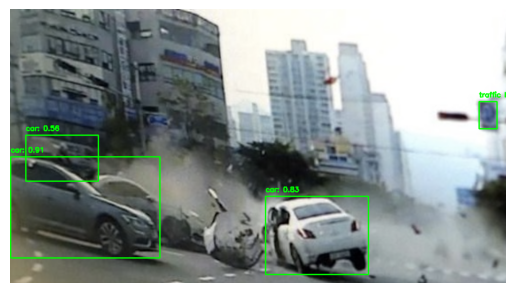

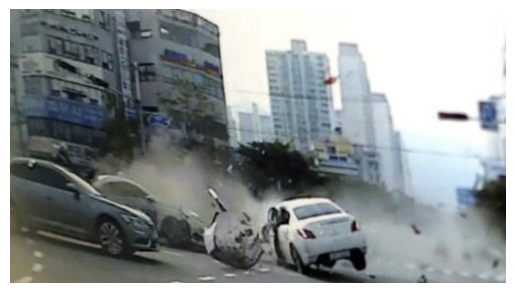

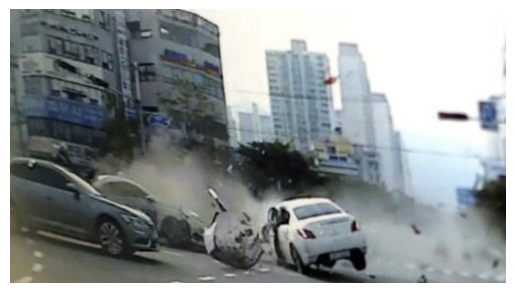

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_boxes(frame, predictions):
    for prediction in predictions:
        bbox = prediction['bbox']
        confidence = prediction['confidence']
        label = prediction['label']

        # Convert normalized coordinates to pixel coordinates
        h, w, _ = frame.shape
        x, y, width, height = bbox
        x = int(x * w)
        y = int(y * h)
        width = int(width * w)
        height = int(height * h)
        x -= width // 2
        y -= height // 2

        # Draw bounding box on the frame
        color = (0, 255, 0)  # Green color
        thickness = 2
        cv2.rectangle(frame, (x, y), (x + width, y + height), color, thickness)

        # Display label and confidence
        label_text = f"{label}: {confidence:.2f}"
        cv2.putText(frame, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    return frame

result_frame = draw_boxes(frame.copy(), detections)
# cv2.imwrite("output2.jpeg", result_frame) 
plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

result_frame = draw_boxes(frame.copy(), accident_detections)
# cv2.imwrite("output2.jpeg", result_frame) 
plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

result_frame = draw_boxes(frame.copy(), fireExplosion_detections)
# cv2.imwrite("output2.jpeg", result_frame) 
plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [12]:
frame = cv2.imread("../samples/climber2.jpg")
outputs = climberYoloModel.predict(source=frame)
detections = parse_yolo_predictions(outputs)
detections


0: 192x256 4 climbers, 18.5ms
Speed: 0.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 192, 256)


[{'confidence': 0.8434908986091614,
  'label': 'climber',
  'bbox': [0.3830188810825348,
   0.3842105269432068,
   0.2528301775455475,
   0.5894736647605896],
  'bbox_std': [101.5, 73.0, 67.0, 112.0],
  'orig_shape': (190, 265)},
 {'confidence': 0.7502453327178955,
  'label': 'climber',
  'bbox': [0.9018868207931519,
   0.41842105984687805,
   0.12075471878051758,
   0.4368421137332916],
  'bbox_std': [239.0, 79.5, 32.0, 83.0],
  'orig_shape': (190, 265)},
 {'confidence': 0.7155665755271912,
  'label': 'climber',
  'bbox': [0.6943396329879761,
   0.49473685026168823,
   0.2339622676372528,
   0.621052622795105],
  'bbox_std': [184.0, 94.0, 62.0, 118.0],
  'orig_shape': (190, 265)}]

In [6]:
# cap = cv2.VideoCapture('rtmp://localhost/mystream')
import time

NUM_FRAMES = 30  # Number of frames per video clip (must match the training configuration)
frame_buffer = []

garbage_last_time = 0
assault_last_time = 0
# videoPath = '../samples/cached/market_explosion_fire.mp4'
# videoPath = '../samples/cached/fire_sample.mp4'
# videoPath = '../samples/cached/explosion_petrolpump.mp4'
# results = fireExplosionYoloModel.predict(source=videoPath, save=True)

videoPath = '../samples/cached/crackdemo.mov'
results = crackYoloModel.predict(source=videoPath, save=True)

# videoPath = '../samples/cached/accident.mp4'
# videoPath = '../samples/cached/hitrun.mp4'
# videoPath = '../samples/cached/vba.mp4'
# results = accidentYoloModel.predict(source=videoPath, save=True)

# print(results)
counter = 0

# cap = cv2.VideoCapture(videoPath)
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     if counter % 50 == 0:
#         results = weaponsYoloModel.predict(source=frame, save=True)
#         # if list(results[0].boxes.cls).count(0) > 0:
#         #     img_with_boxes = results[0].plot()
#         #     cv2.imwrite(f'temp-results/weapons/weapon_f{counter}', img_with_boxes)
#     counter +=1
# cap.release()




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/525) /Users/omkar/projects/rajpol/video-server/models/../samples/cached/crackdemo.mov: 384x640 1 normal_crack, 65.3ms
video 1/1 (2/525) /Users/omkar/projects/rajpol/video-server/models/../samples/cached/crackdemo.mov: 384x640 1 normal_crack, 51.5ms
video 1/1 (3/525) /Users/omkar/projects/rajpol/video-server/models/../samples/cached/crackdemo.mov: 384x640 1 normal_crack, 52.3ms
video 1/1 (4/525) /Users/omkar/projects/rajpol/video-server/mod

In [26]:
import time
import cv2
import platform
from keras.models import load_model
from keras.optimizers import legacy
from matplotlib import pyplot as plt

fightModel = load_model("weights/fights/fights2vgg2cat2.keras")
print("Fight model loaded")

if platform.system() == "Darwin" and platform.processor() == "arm":
    # You can adjust the learning rate if needed
    legacy_adam = legacy.Adam(learning_rate=0.001)
    fightModel.compile(optimizer=legacy_adam,
                       loss='binary_crossentropy', metrics=['accuracy'])
    print("Optimised fight model for apple silicon")


FIGHT_FRAME_WIDTH = 128
FIGHT_FRAME_HEIGHT = 128
# Number of frames per video clip (must match the training configuration)
FIGHT_NUM_FRAMES = 30
frame_buffer = []

assault_last_time = 0
cap = cv2.VideoCapture('../samples/public_cam.mp4')
counter = 0
while True:

    ret, frame = cap.read()
    if not ret:
        break

    # if (time.time()-assault_last_time) > 2:
    if True:
        standardizedFrame = cv2.resize(frame, (FIGHT_FRAME_WIDTH, FIGHT_FRAME_HEIGHT))

        frame_buffer.append(standardizedFrame)

        if len(frame_buffer) > FIGHT_NUM_FRAMES:
            frame_buffer.pop(0)

        if counter % 150 == 0:
        # Perform prediction when the buffer is full
            if len(frame_buffer) == FIGHT_NUM_FRAMES:
                input_video_clip = np.array(frame_buffer)
                input_video_clip = np.expand_dims(input_video_clip, axis=0)

                # Perform prediction
                predictions = fightModel.predict(input_video_clip)

                # Get the class with the highest probability as the predicted class
                predicted_class = np.argmax(predictions, axis=1)

                # Display the result on the frame
                print(f"Predicted Class: {predicted_class[0]}")
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.show()
                
                assault_last_time = time.time()
    counter +=1
cap.release()


Fight model loaded
Optimised fight model for apple silicon


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [12]:
import numpy as np
num = np.int64(1)
num, num.item(), type(num), int(num), type(int(num))

(1, 1, numpy.int64, 1, int)

In [13]:
f = np.float64(0.9985997)
f, f.item(), type(f), float(f), type(float(f))

(0.9985997, 0.9985997, numpy.float64, 0.9985997, float)

In [3]:
import cv2
cap = cv2.VideoCapture("../samples/cached/gun_video_short.mp4")
ret, frame = cap.read()
frame.shape, frame.shape[0], frame.shape[1], frame.shape[2]


((480, 852, 3), 480, 852, 3)